# Exercise 6: Support Vector Machines and Spam Classification with SVMS

In [1]:
import numpy as np
import scipy.io as sio
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings('ignore')

## ===================
## Support Vector Machine
## ===================
### Part 1: Loading and Visualizing Data

In [2]:
data = sio.loadmat('ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X, y = data['X'], data['y']
X.shape, y.shape

((51, 2), (51, 1))

In [4]:
def plotData(X, y):
    '''Plots the data points X and y into a new figure'''
    pos = X[np.where(y == 1)[0]]
    neg = X[np.where(y == 0)[0]]
    plt.figure(figsize=(8, 6))
    plt.plot(pos[:, 0], pos[:, 1], 'r^', markersize=7)
    plt.plot(neg[:, 0], neg[:, 1], 'gv', markersize=7)

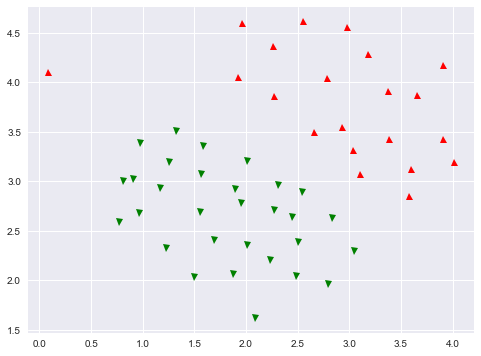

In [5]:
plotData(X, y)

### Part 2: Training Linear SVM

In [6]:
def visualizeBoundaryLinear(X, y, model):
    '''Plots a linear decision boundary learned by the SVM'''
    w = model.coef_.ravel()
    b = model.intercept_
    xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    yp = -(w[0] * xp + b) / w[1]
    plotData(X, y)
    plt.plot(xp, yp, '-b')

In [7]:
C = 1
model = SVC(C=C, kernel='linear')
model.fit(X, y.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

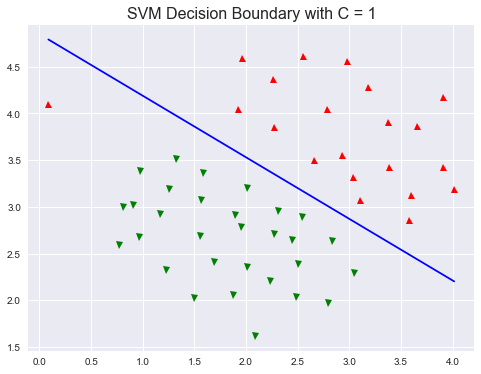

In [8]:
visualizeBoundaryLinear(X, y, model)
plt.title('SVM Decision Boundary with C = {}'.format(C), fontsize=16)
plt.show()

**_Try different C values_**

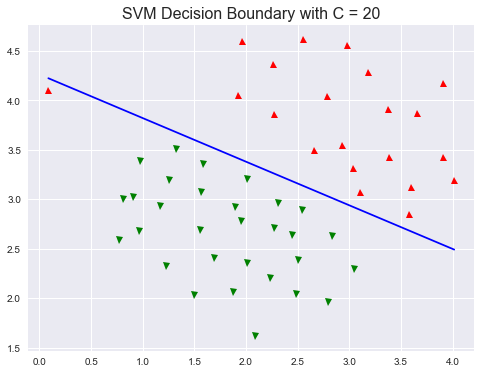

In [9]:
C = 20
model = SVC(C=C, kernel='linear')
model.fit(X, y.ravel())
visualizeBoundaryLinear(X, y, model)
plt.title('SVM Decision Boundary with C = {}'.format(C), fontsize=16)
plt.show()

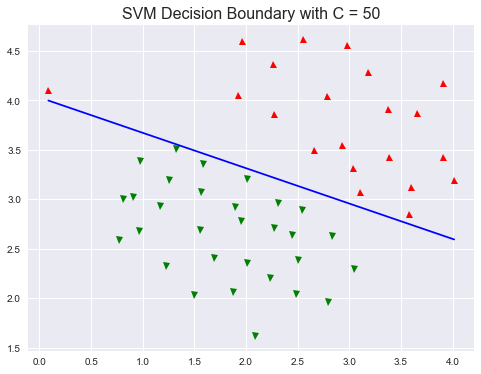

In [10]:
C = 50
model = SVC(C=C, kernel='linear')
model.fit(X, y.ravel())
visualizeBoundaryLinear(X, y, model)
plt.title('SVM Decision Boundary with C = {}'.format(C), fontsize=16)
plt.show()

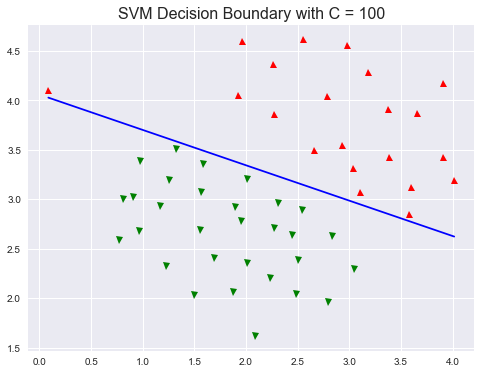

In [11]:
C = 100
model = SVC(C=C, kernel='linear')
model.fit(X, y.ravel())
visualizeBoundaryLinear(X, y, model)
plt.title('SVM Decision Boundary with C = {}'.format(C), fontsize=16)
plt.show()

### Part 3: Implementing Gaussian Kernel

In [12]:
def gaussianKernel(x1, x2, sigma):
    '''RBFKERNEL returns a radial basis function kernel between x1 and x2'''
    return np.e**(-sum((x1.ravel() - x2.ravel())**2) / 2 / sigma**2)

In [13]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1] and x2 = [0, 4, -1] with sigma = 2: \n\n', sim)

Gaussian Kernel between x1 = [1, 2, 1] and x2 = [0, 4, -1] with sigma = 2: 

 0.32465246735834974


### Part 4: Visualizing Dataset 2

In [14]:
data = sio.loadmat('ex6data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [15]:
X, y = data['X'], data['y']
X.shape, y.shape

((863, 2), (863, 1))

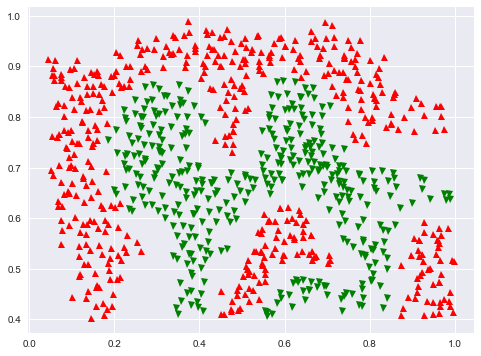

In [16]:
plotData(X, y)

### Part 5: Training SVM with RBF Kernel (Dataset 2)

In [17]:
C = 1
sigma = .1
model = SVC(C=C, kernel='rbf', gamma=sigma)
model.fit(X, y.reshape(-1))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
def visualizeBoundary(X, y, model):
    plotData(X, y)
    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.c_[X1[:, i], X2[:, i]]
        vals[:, i] = model.predict(this_X)
    plt.contour(X1, X2, vals, [0], cmap='winter')

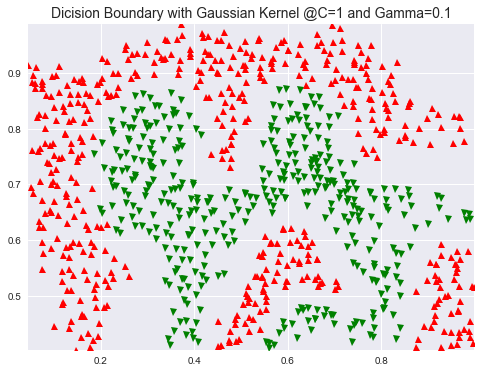

In [19]:
visualizeBoundary(X, y, model)
plt.title('Dicision Boundary with Gaussian Kernel @C={} and Gamma={}'.format(C, sigma),
         fontsize=14)
plt.show()

**_No boundary plotted. Try bigger params._**

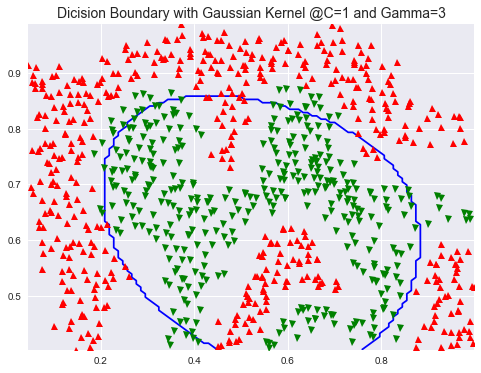

In [20]:
C = 1
sigma = 3
model = SVC(C=C, kernel='rbf', gamma=sigma)
model.fit(X, y.reshape(-1))
visualizeBoundary(X, y, model)
plt.title('Dicision Boundary with Gaussian Kernel @C={} and Gamma={}'.format(C, sigma),
         fontsize=14)
plt.show()

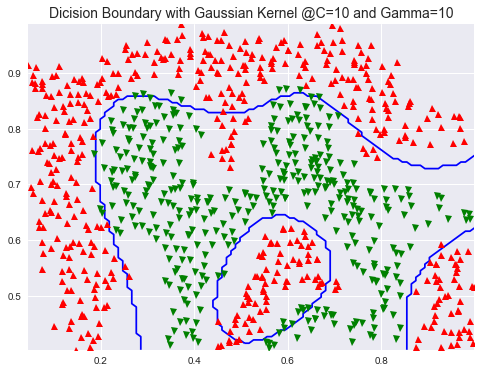

In [21]:
C = 10
sigma = 10
model = SVC(C=C, kernel='rbf', gamma=sigma)
model.fit(X, y.reshape(-1))
visualizeBoundary(X, y, model)
plt.title('Dicision Boundary with Gaussian Kernel @C={} and Gamma={}'.format(C, sigma),
         fontsize=14)
plt.show()

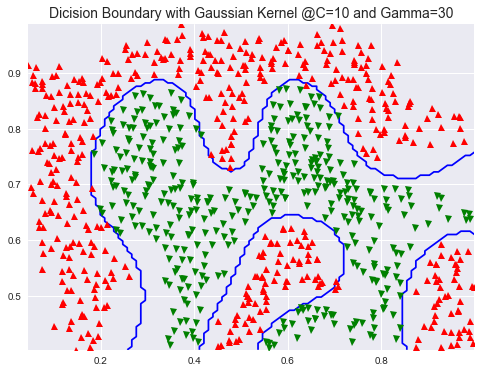

In [22]:
C = 10
sigma = 30
model = SVC(C=C, kernel='rbf', gamma=sigma)
model.fit(X, y.reshape(-1))
visualizeBoundary(X, y, model)
plt.title('Dicision Boundary with Gaussian Kernel @C={} and Gamma={}'.format(C, sigma),
         fontsize=14)
plt.show()

### Part 6: Visualizing Dataset 3

In [23]:
data = sio.loadmat('ex6data3.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [24]:
X, y, Xval, yval = data['X'], data['y'], data['Xval'], data['yval']
X.shape, y.shape, Xval.shape, yval.shape

((211, 2), (211, 1), (200, 2), (200, 1))

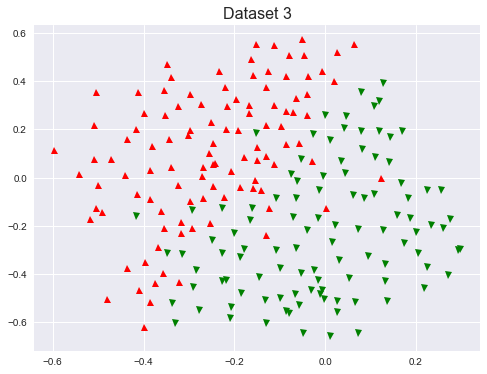

In [25]:
plotData(X, y)
plt.title('Dataset 3', fontsize=16)
plt.show()

### Part 7: Training SVM with RBF Kernel (Dataset 3)

In [26]:
def dataset3Prams(X, y, Xval, yval):
    '''Returns your choice of C and sigma for Part 3 of the exercise
       where you select the optimal (C, sigma) learning parameters to use for SVM 
       with RBF kernel'''
    plist = [.01, .03, .1, .3, 1, 3, 10, 30]
    errmin = 10000000
    for i in range(len(plist)):
        C = plist[i]
        for j in range(len(plist)):
            sigma = plist[j]**.5
            model = SVC(C=C, kernel='rbf', gamma=sigma).fit(X, y.ravel())   
            pred = model.predict(Xval)
            err = 1 - model.score(Xval, yval)
            #print(C, '\t', plist[j], '\t', err)
            if err < errmin:
                errmin = err
                csind = [C, sigma]
    return csind[0], csind[1]

In [27]:
C, sigma = dataset3Prams(X, y, Xval, yval)
C, sigma

(1, 5.477225575051661)

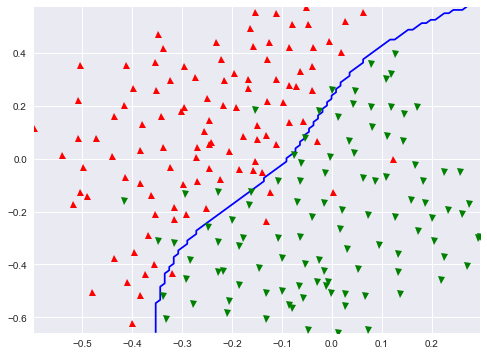

In [28]:
model = SVC(C=C, kernel='rbf', gamma=sigma).fit(X, y.ravel())
visualizeBoundary(X, y, model)

## ================
## Spam Classification
## ================
### Part 1: Email Preprocessing

In [29]:
def getVocabList():
    '''Reads the fixed vocabulary list in vocab.txt and 
       returns a cell array of the words'''
    fid = np.loadtxt('vocab.txt', delimiter='\t', dtype=str)[:, 1]
    n = 1899
    vocabList = {}
    for i in range(n):
        vocabList[i] = fid[i]
    return vocabList

def processEmail(email_contents):
    '''Preprocesses the body of an email and returns a list of word_indices'''
    import re
    from nltk.stem.porter import PorterStemmer
    vocabList = getVocabList()
    word_indices = []
    email_contents = re.sub('^\n\n', '', email_contents) # Remove empty header
    email_contents = email_contents.lower() # Lower-casing
    email_contents = re.sub('$', 'dollar', email_contents) # Replace $
    email_contents = re.sub('<[^<>]+>', ' ', email_contents) # Special signs
    email_contents = re.sub('[0-9]+', 'number', email_contents) # Numbers
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents) # Web addr.
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents) # Email addr.
    email_contents = re.sub('[$]+', 'dollar', email_contents) # Dollar sign
    
    while len(email_contents) > 0:
        try:
            string, email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\t\n]', 
                                              email_contents, maxsplit=1)
        except: # End the loop when there's only one word left and can't split any more.
            break
        string = re.sub('[^a-zA-Z0-9]', '', string)
        string = PorterStemmer().stem(string.strip()) # Apply Porter Stemmer algorithm
        
        if len(string) < 1:
            continue
            
        for i in range(len(vocabList)): # Compare sting with vocab and add match to indices 
            if vocabList[i] == string:
                word_indices.append(i)
            else:
                continue
    l = ''   
    for ind in word_indices:
        l += vocabList[ind] + ' '
    print('Processed Email:\n', l, '\n\n')
    return word_indices

def emailFeatures(word_indices):
    '''Takes in a word_indices vector and produces a feature vector 
       from the word indices'''
    n = 1899
    x = np.zeros((n, 1))
    for i in range(len(word_indices)):
        x[word_indices[i]] = 1
    return x

In [30]:
with open('emailSample1.txt', 'r') as f:
    file_contents = f.read()
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [31]:
word_indices = processEmail(file_contents)

Processed Email:
 anyon know how much it cost to host web well it depend on how mani your expect thi can be anywher from less than number month to coupl of dollarnumb you should httpaddr or perhap if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr dollar  




### Part 2: Feature Extraction

In [32]:
features = emailFeatures(word_indices)

print('Word Indices: \n', word_indices)
print('\n\nLength of feature vector: \n', len(features))
print('\n\nNumber of non_zero entries:\n', sum(features > 0)[0])

Word Indices: 
 [85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 478, 1892, 1509, 798, 1181, 1236, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530, 476]


Length of feature vector: 
 1899


Number of non_zero entries:
 45


### Part 3: Train Linear SVM for Spam Classification

In [33]:
data = sio.loadmat('spamTrain.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [34]:
X, y = data['X'], data['y']
C = .1
model = SVC(C=C, kernel='linear')
model.fit(X, y.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
p = model.predict(X)
print('Training Accuracy: \n', np.mean(p == y.ravel()) * 100)

Training Accuracy: 
 99.825


### Part 4: Test Spam Classification

In [36]:
data = sio.loadmat('spamTest.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [37]:
X_test, y_test = data['Xtest'], data['ytest']
p = model.predict(X_test)
print('Test Accuracy:\n', np.mean(p == y_test.ravel()) * 100)

Test Accuracy:
 98.9


### Part 5: Top Predictors of Spam

In [38]:
idx = np.argsort(model.coef_.flatten(), axis=0)
top_coefs = model.coef_.flatten()[idx[-15:]]
vocabList = getVocabList()

print('\nTop predictors of spam:\n')
for i in range(14, -1, -1):
    if len(vocabList[idx[-15:][i]]) < 8:
        print(vocabList[idx[-15:][i]], '\t\t\t', top_coefs[i])
    else:
        print(vocabList[idx[-15:][i]], '\t\t', top_coefs[i])


Top predictors of spam:

our 			 0.5006137361746403
click 			 0.465916390688888
remov 			 0.42286911706104086
guarante 		 0.38362160179406524
visit 			 0.367710398245535
basenumb 		 0.3450640979461706
dollar 			 0.3236320357963838
will 			 0.2697241060374008
price 			 0.2672977146177071
pleas 			 0.2611688867001495
most 			 0.2572981979518164
nbsp 			 0.2539414551595324
lo 			 0.25346652431419925
ga 			 0.24829699045568662
hour 			 0.24640435783158998


### Part 6: Try Your Own Emails

In [39]:
with open('spamSample1.txt', 'r') as f:
    file_contents = f.read()
file_contents

'Do You Want To Make $1000 Or More Per Week?\n\n \n\nIf you are a motivated and qualified individual - I \nwill personally demonstrate to you a system that will \nmake you $1,000 per week or more! This is NOT mlm.\n\n \n\nCall our 24 hour pre-recorded number to get the \ndetails.  \n\n \n\n000-456-789\n\n \n\nI need people who want to make serious money.  Make \nthe call and get the facts. \n\nInvest 2 minutes in yourself now!\n\n \n\n000-456-789\n\n \n\nLooking forward to your call and I will introduce you \nto people like yourself who\nare currently making $10,000 plus per week!\n\n \n\n000-456-789\n\n\n\n3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72\n\n'

In [40]:
word_indices = processEmail(file_contents)
x = emailFeatures(word_indices)

Processed Email:
 do you want to make dollarnumb or more per week if you motiv and qualifi individu will person to you system that will make you dollarnumb number per week or more thi is not call our number hour number to get the detail need peopl who want to make seriou make the call and get the fact invest number minut in yourself now look forward to your call and will introduc you to peopl like yourself who current make dollarnumb number plu per week dollar  




In [41]:
p = model.predict(x.reshape(1, 1899))

print('\nProcessed spamSample1.txt\n\nSpam Classification: ', p)
print('(1 indicates spam, 0 indicates not spam)')


Processed spamSample1.txt

Spam Classification:  [1]
(1 indicates spam, 0 indicates not spam)


**_Two emails from my own InBox_**

In [42]:
with open('myEmailSample1.txt', 'r') as f:
    file_contents = f.read()
word_indices = processEmail(file_contents)
x = emailFeatures(word_indices)
p = model.predict(x.reshape(1, 1899))

print('\nProcessed myEmailSample1.txt\n\nSpam Classification: ', p)
print('(1 indicates spam, 0 indicates not spam)')

Processed Email:
 free deliveri avail worldwid men women live chat with us uk deliveri free over number over number design brand view email onlin number the com limit trade as the regist in no number regist offic numberth hous privaci polici add to safe sender list unsubscrib price and titl correct at the time of send email subject to avail save base on unless otherwis state usual discount code exclus will appli pleas refer to websit for further detail dollar  



Processed myEmailSample1.txt

Spam Classification:  [1]
(1 indicates spam, 0 indicates not spam)


In [43]:
with open('myEmailSample2.txt', 'r') as f:
    file_contents = f.read()
word_indices = processEmail(file_contents)
x = emailFeatures(word_indices)
p = model.predict(x.reshape(1, 1899))

print('\nProcessed myEmailSample2.txt\n\nSpam Classification: ', p)
print('(1 indicates spam, 0 indicates not spam)')

Processed Email:
 learn suppli manag onlin develop and appli the foundat tool approach and techniqu necessari for design and oper system and integr suppli suppli an onlin cours offer by on and an entri point to the suppli manag thi cours is free to tri and start on juli number number look for someth differ join of our other program and data scienc data econom and develop polici principl of manufactur code to save number on ani purchas on org offer expir june number cours start thi summer to engin and human engin is excit and you dont have to be to share in the excit number numberx make the basic of access to everyon start june number to comput scienc and program python comput scienc an to comput scienc as tool to solv problem python number number start june number machin learn with python from model to learn comput scienc an to the field of machin learn from model to learn and learn through python project start june number principl of comput scienc learn how to engin system and program